<a href="https://colab.research.google.com/github/anagjurchinova/DataScience_2025/blob/main/Mental_Health_dataset_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Laboratory Exercise - Run Mode (8 points)

## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

Load the dataset into a `pandas` data frame.

In [3]:
data = pd.read_csv('/content/sample_data/mental_health_diagnosis_treatment_data.csv')
data.drop('Patient ID', axis=1, inplace=True)
data.head()

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,NaN,Deteriorated,7,Anxious,66
1,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7.0,No Change,7,Neutral,78
2,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,NaN,Deteriorated,5,Happy,62
3,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8.0,Deteriorated,10,Excited,72
4,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5.0,Deteriorated,6,Excited,63


Preprocess the input and the output variables appropriately.

In [5]:
data['Outcome'].isnull().sum()

0

Explore the dataset using visualizations of your choice.

In [20]:
def visualize(data, columns, numerical):
  plt.figure(figsize=(14,4))
  for i in range(0, len(columns)):
    plt.subplot(1, len(columns), i+1)
    if numerical == True:
      plt.hist(data[columns[i]], bins=15)
    else:
      counts = data.groupby(columns[i]).size()
      plt.bar(counts.index.astype(str), counts)
    plt.title(columns[i])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           475 non-null    float64
 1   Gender                        500 non-null    object 
 2   Diagnosis                     500 non-null    object 
 3   Symptom Severity (1-10)       500 non-null    int64  
 4   Mood Score (1-10)             500 non-null    int64  
 5   Sleep Quality (1-10)          500 non-null    int64  
 6   Physical Activity (hrs/week)  450 non-null    float64
 7   Medication                    500 non-null    object 
 8   Therapy Type                  500 non-null    object 
 9   Treatment Start Date          500 non-null    object 
 10  Treatment Duration (weeks)    500 non-null    int64  
 11  Stress Level (1-10)           400 non-null    float64
 12  Outcome                       500 non-null    object 
 13  Treat

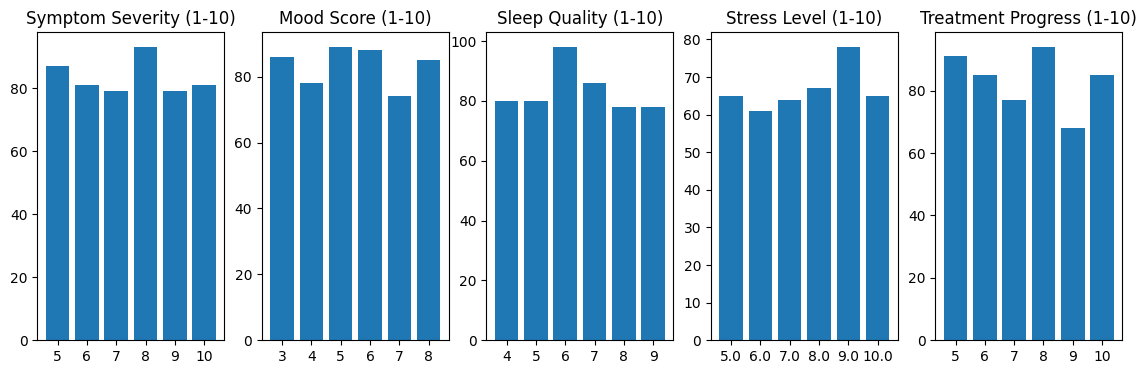

In [21]:
visualize(data, ['Symptom Severity (1-10)', 'Mood Score (1-10)', 'Sleep Quality (1-10)', 'Stress Level (1-10)', 'Treatment Progress (1-10)'], False)

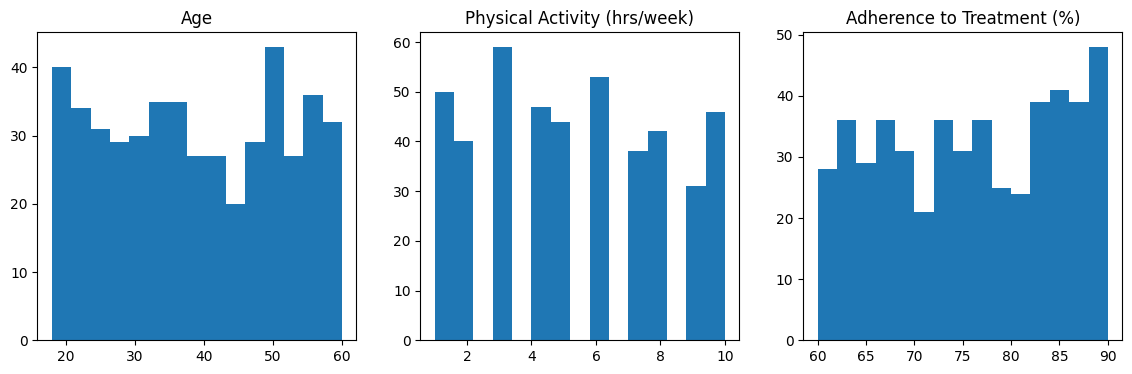

In [24]:
visualize(data, ['Age', 'Physical Activity (hrs/week)', 'Adherence to Treatment (%)'], True)
# Not normally distributed

In [25]:
data['AI-Detected Emotional State'].value_counts()

,count
AI-Detected Emotional State,
Anxious,102
Neutral,87
Excited,85
Stressed,79
Happy,78
Depressed,69


In [29]:
state_by_age = data.groupby('AI-Detected Emotional State')['Age'].mean()
state_by_age

,Age
AI-Detected Emotional State,
Anxious,40.297872
Depressed,38.784615
Excited,35.646341
Happy,39.424658
Neutral,39.809524
Stressed,37.558442


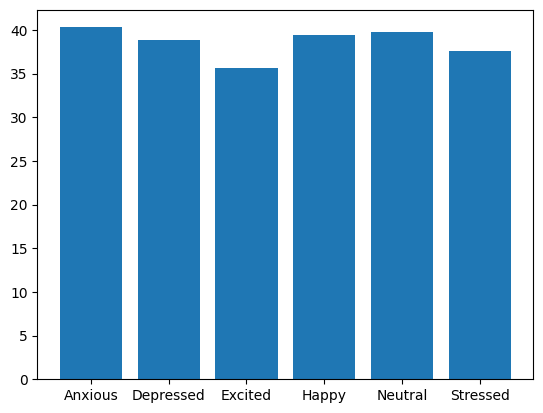

In [33]:
plt.bar(state_by_age.index, state_by_age)
plt.show()
# People below 35 are at low risk for any of the detected states.

Check if the dataset is balanced.

In [35]:
data['Outcome'].value_counts()
# The dataset is slightly imbalanced for the No Change class.

,count
Outcome,
Deteriorated,171
Improved,170
No Change,159


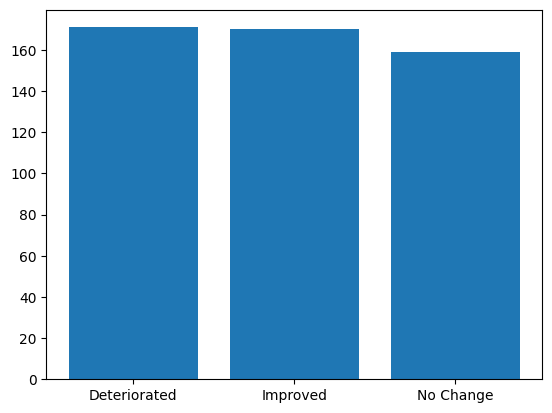

In [36]:
counts = data['Outcome'].value_counts()
plt.bar(counts.index, counts)
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [37]:
data.isnull().mean() * 100

,0
Age,5.0
Gender,0.0
Diagnosis,0.0
Symptom Severity (1-10),0.0
Mood Score (1-10),0.0
Sleep Quality (1-10),0.0
Physical Activity (hrs/week),10.0
Medication,0.0
Therapy Type,0.0
Treatment Start Date,0.0


<Axes: >

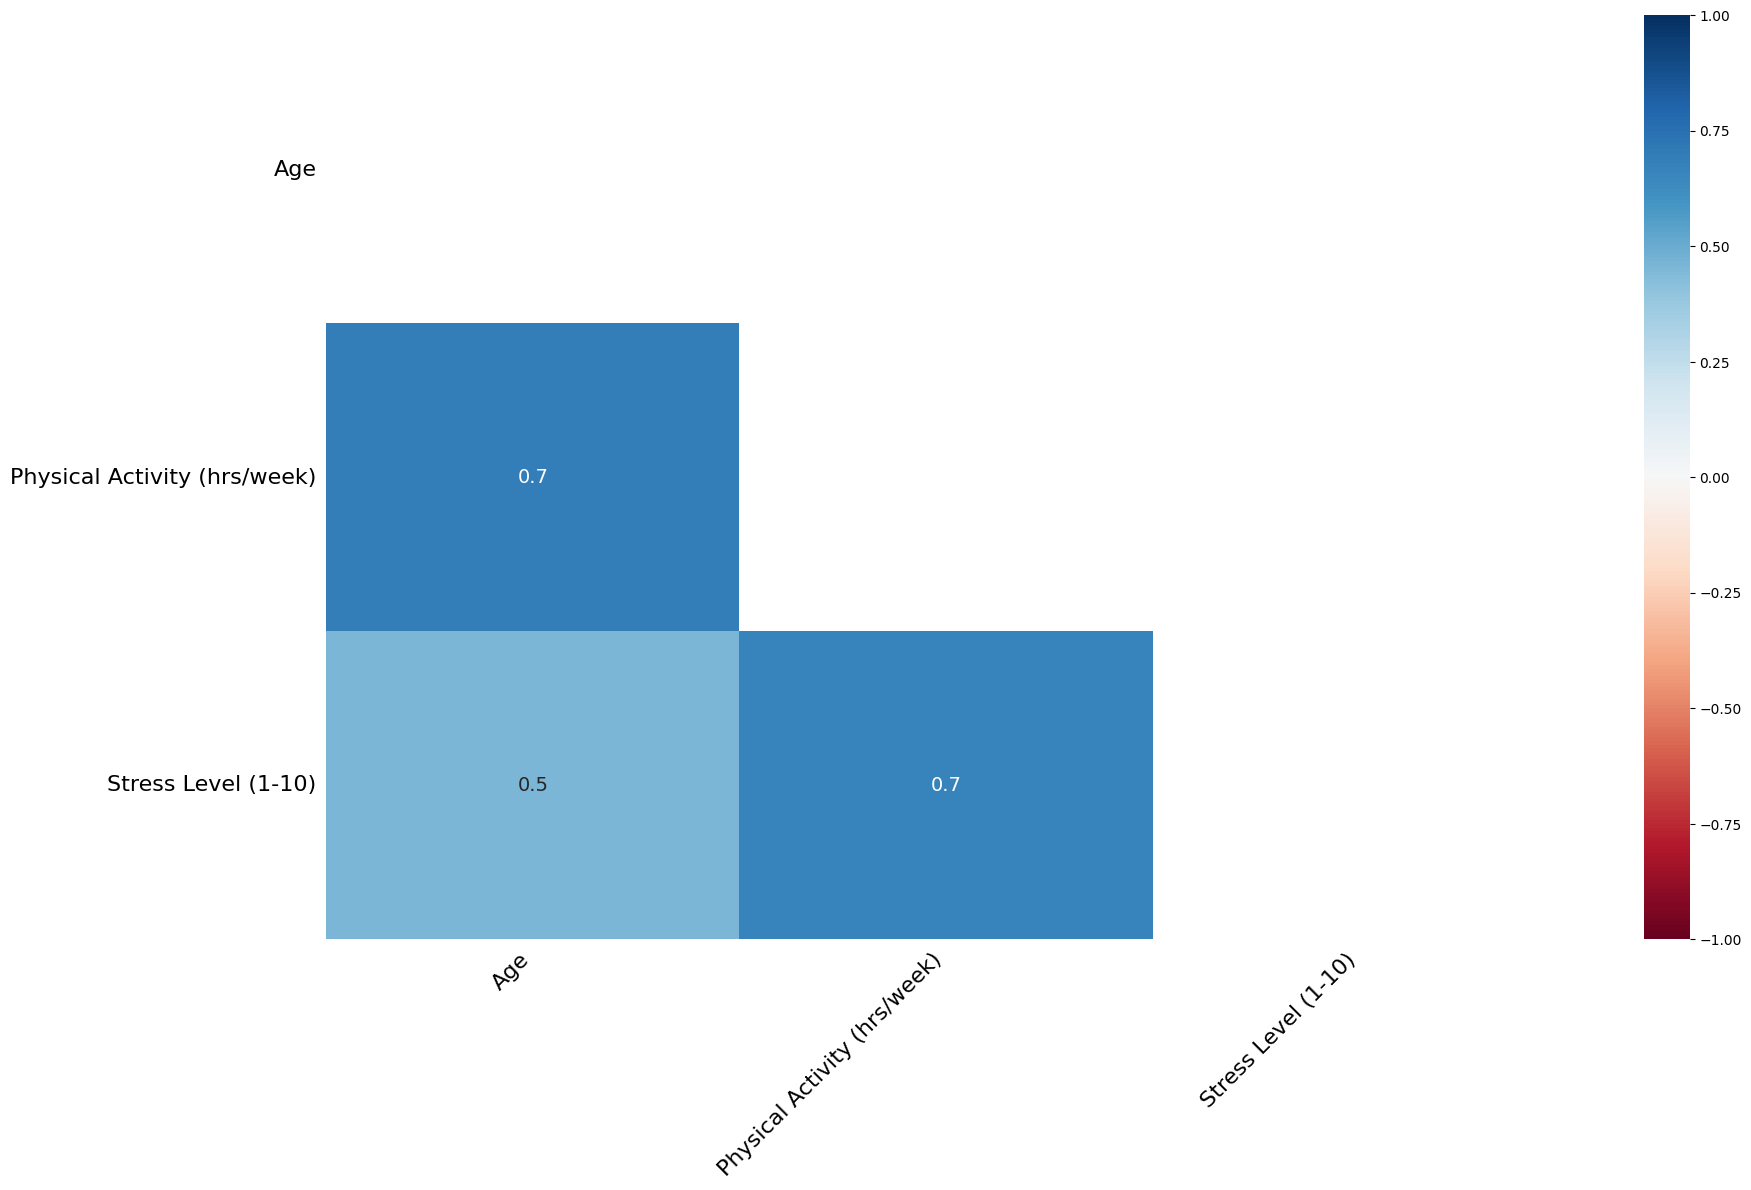

In [38]:
msno.heatmap(data)
# We can see correlation between Physical Activity and Age, and Stress Level and Physical Activity. It suggests MAR, because this heatmap shows us
# correlation between the missing values of the features.

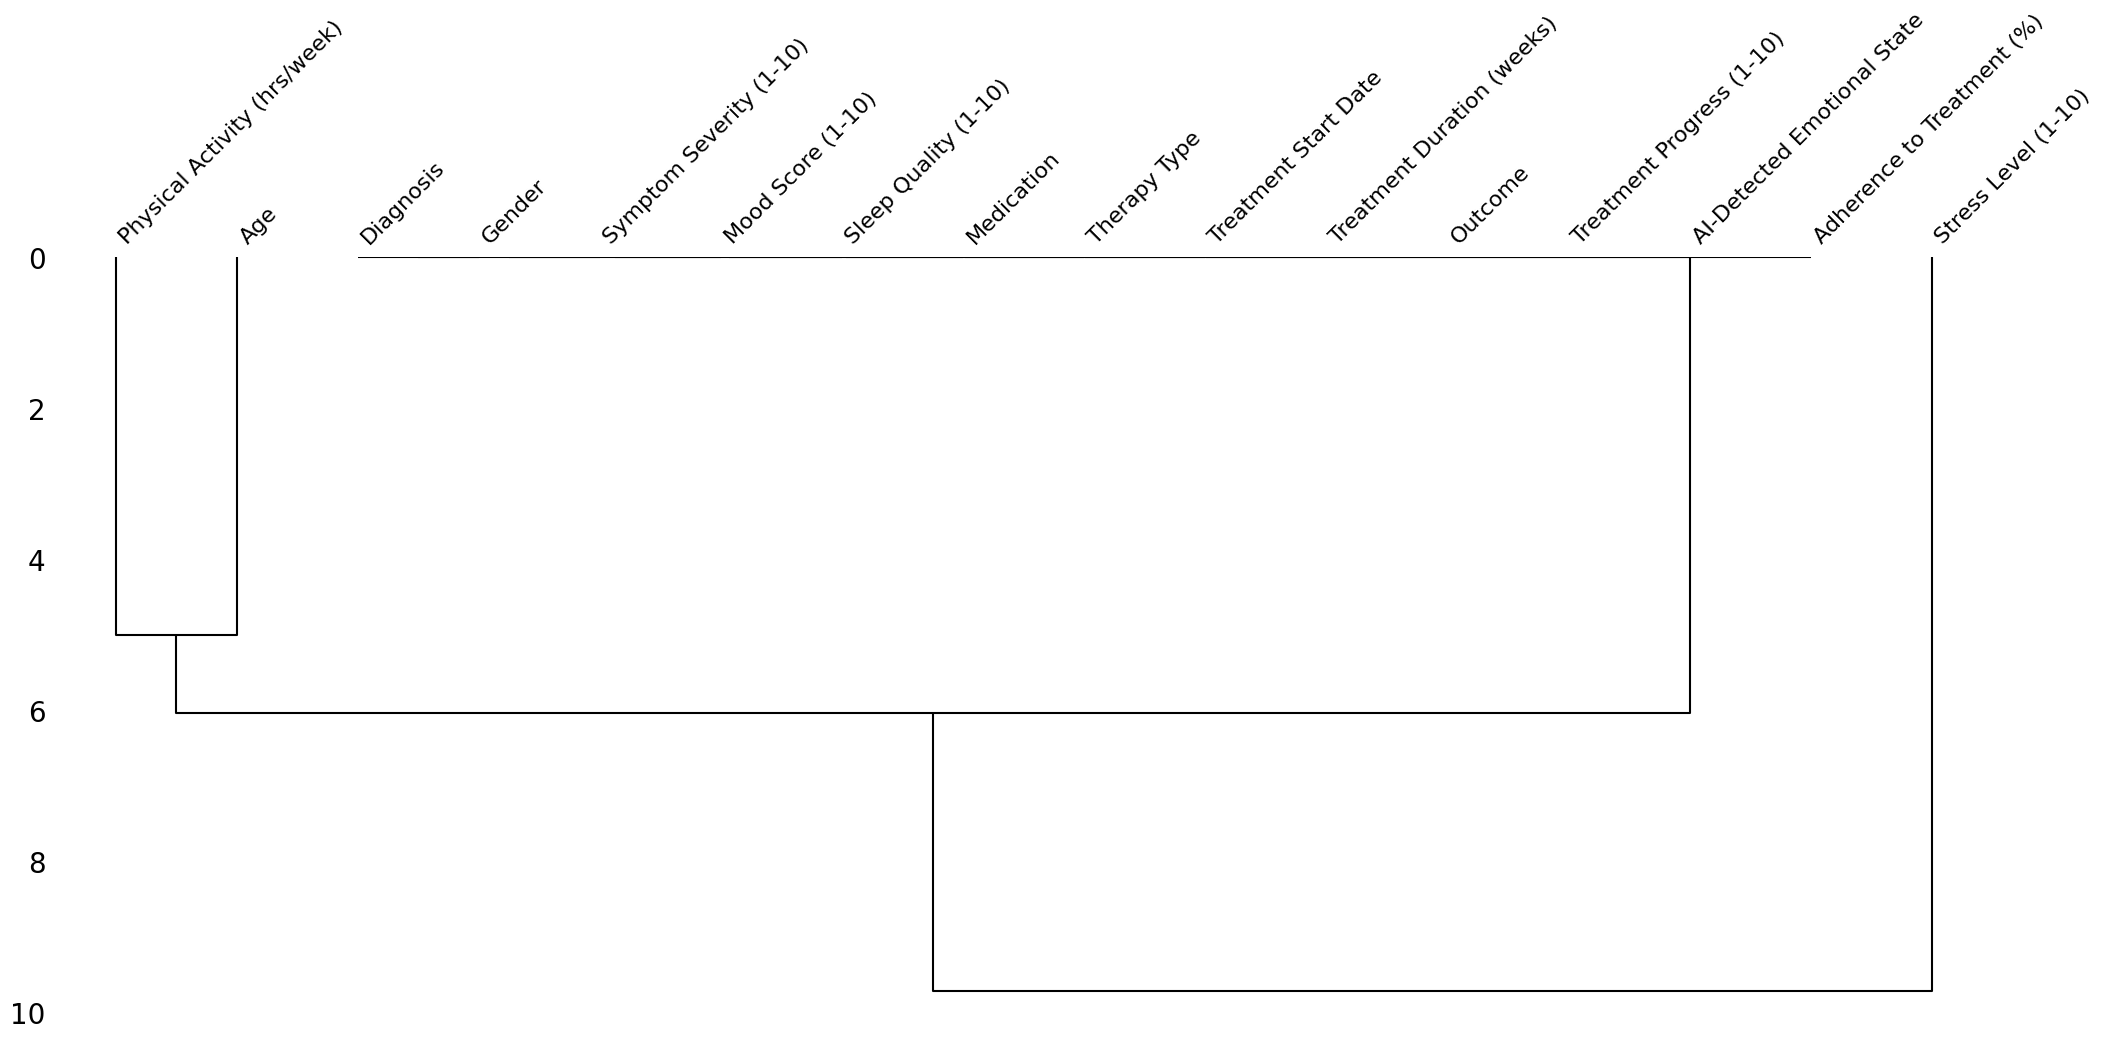

In [42]:
msno.dendrogram(data)
plt.show()
# There is a very high correlation between Stress Level and Sleep Quality.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           475 non-null    float64
 1   Gender                        500 non-null    object 
 2   Diagnosis                     500 non-null    object 
 3   Symptom Severity (1-10)       500 non-null    int64  
 4   Mood Score (1-10)             500 non-null    int64  
 5   Sleep Quality (1-10)          500 non-null    int64  
 6   Physical Activity (hrs/week)  450 non-null    float64
 7   Medication                    500 non-null    object 
 8   Therapy Type                  500 non-null    object 
 9   Treatment Start Date          500 non-null    object 
 10  Treatment Duration (weeks)    500 non-null    int64  
 11  Stress Level (1-10)           400 non-null    float64
 12  Outcome                       500 non-null    object 
 13  Treat

In [58]:
data_copy = data.sort_values('Treatment Start Date')
# We are sorting the dataset so the label encodes the dates ascending

In [46]:
def label(data, columns):
  data_copy = data.copy()
  le = LabelEncoder()
  for column in columns:
    non_nans = data_copy[column].dropna()
    le.fit(non_nans)
    data_copy[column] = data_copy[column].apply(lambda x: le.transform([x])[0] if pd.notna(x) else x)

  return data_copy

In [59]:
data_encoded = label(data_copy, ['Gender','Diagnosis','AI-Detected Emotional State', 'Therapy Type', 'Medication', 'Treatment Start Date', 'Outcome'])
data_encoded

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
20,19.0,1,2,8,4,5,7.0,3,0,0,14,5.0,1,5,1,67
50,40.0,1,1,6,5,7,2.0,2,0,0,14,7.0,2,10,5,81
181,28.0,1,2,6,5,6,6.0,3,0,0,12,7.0,1,5,4,60
133,41.0,0,2,10,4,9,3.0,2,3,0,15,8.0,0,8,5,68
235,27.0,1,1,6,6,6,2.0,2,1,0,12,10.0,1,10,0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,56.0,1,1,10,5,8,1.0,3,3,99,10,7.0,0,8,3,83
495,NaN,1,1,10,4,8,NaN,4,1,99,8,NaN,1,10,1,73
431,51.0,0,0,7,3,5,4.0,3,1,99,11,NaN,1,5,4,67
241,38.0,0,1,9,3,5,8.0,4,3,100,16,8.0,2,9,0,66


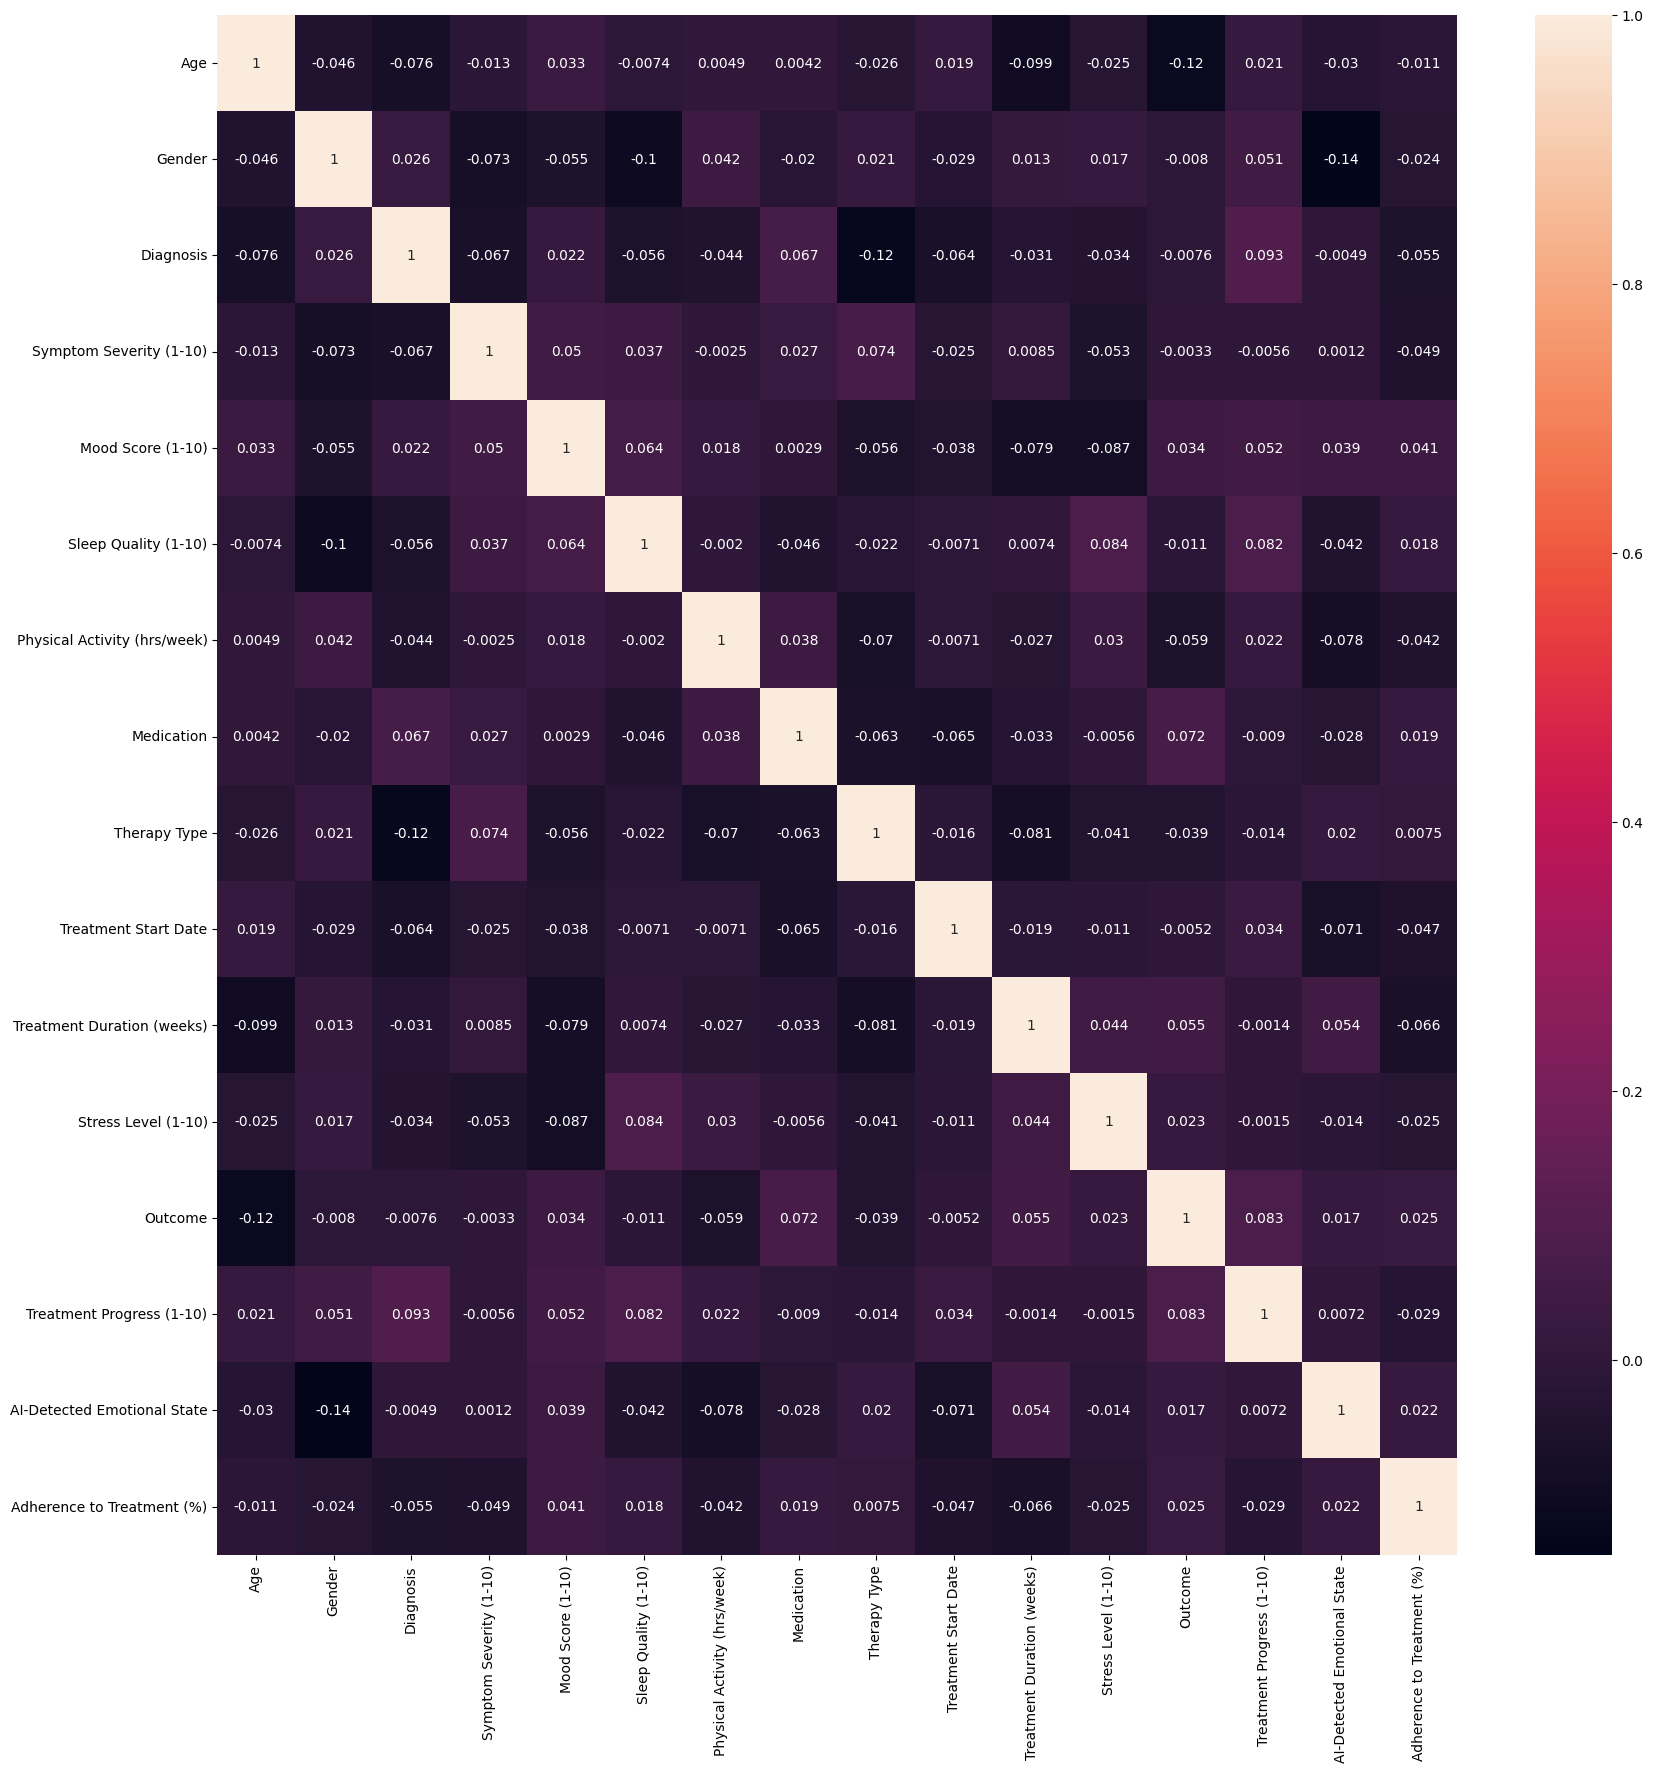

In [55]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_encoded.corr(), annot=True)
plt.show()

In [60]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_encoded[['Physical Activity (hrs/week)', 'Stress Level (1-10)']])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)

data_encoded[['Physical Activity (hrs/week)', 'Stress Level (1-10)']] = imputed_data
data_encoded.isnull().mean() * 100

,0
Age,5.0
Gender,0.0
Diagnosis,0.0
Symptom Severity (1-10),0.0
Mood Score (1-10),0.0
Sleep Quality (1-10),0.0
Physical Activity (hrs/week),0.0
Medication,0.0
Therapy Type,0.0
Treatment Start Date,0.0


In [61]:
# We will impute median for age, since it has a few missing values and the distribution is not normal. Plus age is a simple feature.
data_encoded.Age = data_encoded.Age.fillna(data_encoded.Age.median())

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [66]:
from sklearn.model_selection import train_test_split
data_copy = data_encoded.copy()
data_copy.drop('Outcome', axis=1, inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(data_copy[data_copy.columns],  data_encoded['Outcome'], test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [68]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [71]:
predictions = classifier.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[14 15  4]
 [19 12  5]
 [15 10  6]]
              precision    recall  f1-score   support

           0       0.29      0.42      0.35        33
           1       0.32      0.33      0.33        36
           2       0.40      0.19      0.26        31

    accuracy                           0.32       100
   macro avg       0.34      0.32      0.31       100
weighted avg       0.34      0.32      0.31       100



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [73]:
from sklearn.model_selection import train_test_split
data_copy = data_encoded.copy()
data_copy.drop('Outcome', axis=1, inplace=True)

X_train, X_test, Y_train, Y_test = train_test_split(data_copy[data_copy.columns],  data_encoded['Outcome'], test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [75]:
from sklearn.metrics import accuracy_score
accuracies = dict()

for i in range(1,15,2):
  clf = KNeighborsClassifier(n_neighbors = i)
  clf.fit(X_train, Y_train)
  predictions = clf.predict(X_test)
  accuracies[i] = accuracy_score(Y_test, predictions)

accuracies

{1: 0.3, 3: 0.3, 5: 0.24, 7: 0.32, 9: 0.32, 11: 0.34, 13: 0.28}

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [77]:
clf = KNeighborsClassifier(n_neighbors = 11)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[8 7 3]
 [5 7 5]
 [7 6 2]]
              precision    recall  f1-score   support

           0       0.40      0.44      0.42        18
           1       0.35      0.41      0.38        17
           2       0.20      0.13      0.16        15

    accuracy                           0.34        50
   macro avg       0.32      0.33      0.32        50
weighted avg       0.32      0.34      0.33        50

